In [22]:
pip install split-folders

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
# import os
# import shutil
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# import tensorflow as tf
# from tensorflow.keras import layers, models, Input
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# from tensorflow.keras.applications import ResNet50, EfficientNetB0
# from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess
# from tensorflow.keras.applications.efficientnet import preprocess_input as effnet_preprocess

# from sklearn.metrics import confusion_matrix, classification_report
# import splitfolders

# import json
# import os

In [24]:
# dataset_dir = r"data UAP"
# output_dir  = r"DATA SPLIT"

# if os.path.exists(output_dir):
#     shutil.rmtree(output_dir)

# splitfolders.ratio(
#     dataset_dir,
#     output=output_dir,
#     seed=42,
#     ratio=(0.8, 0.2)
# )

# print("✅ Dataset berhasil di-split")

In [25]:
# IMG_SIZE = (224, 224)
# BATCH_SIZE = 32

# train_dir = r"DATA SPLIT\train"
# val_dir   = r"DATA SPLIT\val"

In [26]:
# def count_images_per_class(directory):
#     class_counts = {}
#     for class_name in os.listdir(directory):
#         class_path = os.path.join(directory, class_name)
#         if os.path.isdir(class_path):
#             class_counts[class_name] = len(os.listdir(class_path))
#     return class_counts

# train_counts = count_images_per_class(train_dir)
# val_counts   = count_images_per_class(val_dir)

# print("📊 Jumlah Data Training per Kelas:")
# print(train_counts)

# print("\n📊 Jumlah Data Validation per Kelas:")
# print(val_counts)

In [27]:
# plt.figure(figsize=(8,4))
# sns.barplot(
#     x=list(train_counts.keys()),
#     y=list(train_counts.values())
# )
# plt.title("Distribusi Kelas Data Training")
# plt.ylabel("Jumlah Gambar")
# plt.xlabel("Kelas")
# plt.show()

In [28]:
# plt.figure(figsize=(10,5))

# for idx, class_name in enumerate(os.listdir(train_dir)):
#     class_path = os.path.join(train_dir, class_name)
#     img_name = os.listdir(class_path)[0]
#     img_path = os.path.join(class_path, img_name)

#     img = plt.imread(img_path)

#     plt.subplot(1, len(os.listdir(train_dir)), idx+1)
#     plt.imshow(img)
#     plt.title(class_name)
#     plt.axis("off")

# plt.suptitle("Contoh Gambar dari Tiap Kelas")
# plt.show()

Copying files: 6000 files [00:13, 441.52 files/s]


✅ Dataset berhasil di-split
📊 Training: {'glioma': 2224, 'notumor': 2575}
📊 Validation: {'glioma': 557, 'notumor': 644}


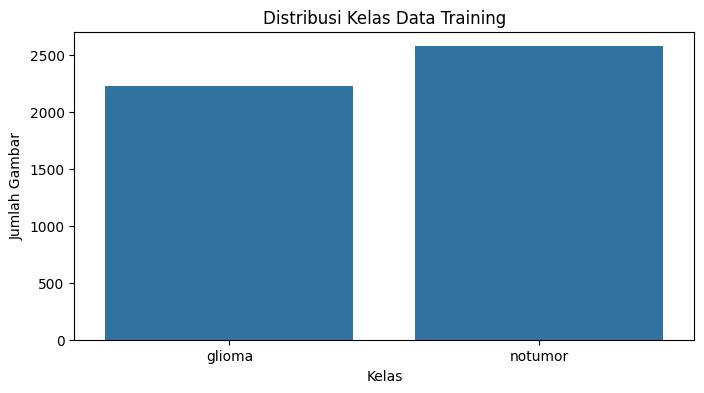

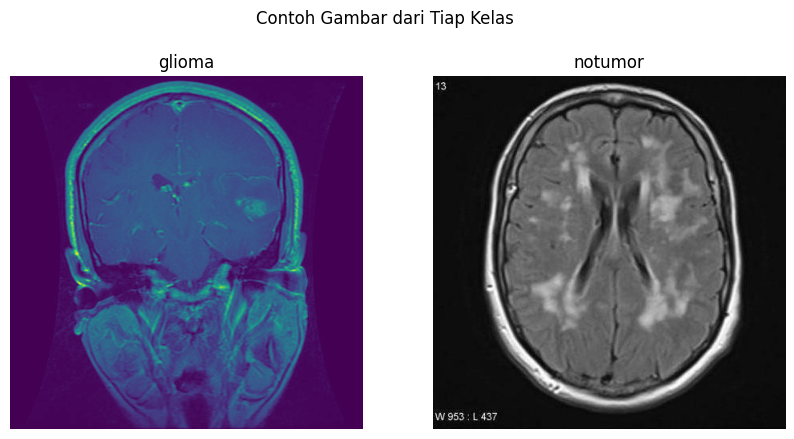

In [29]:
# ==============================
# INSTALL (jalankan sekali)
# ==============================
# pip install split-folders

# ==============================
# IMPORT LIBRARY
# ==============================
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input

from sklearn.metrics import confusion_matrix, classification_report
import splitfolders


# ==============================
# DATASET SPLITTING
# ==============================
dataset_dir = r"data UAP"
output_dir  = r"DATA SPLIT"

if os.path.exists(output_dir):
    shutil.rmtree(output_dir)

splitfolders.ratio(
    dataset_dir,
    output=output_dir,
    seed=42,
    ratio=(0.8, 0.2)
)

print("✅ Dataset berhasil di-split")



# ==============================
# CONFIGURATION
# ==============================
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir = r"DATA SPLIT\train"
val_dir   = r"DATA SPLIT\val"



# ==============================
# COUNT IMAGE PER CLASS
# ==============================
def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

train_counts = count_images_per_class(train_dir)
val_counts   = count_images_per_class(val_dir)

print("📊 Training:", train_counts)
print("📊 Validation:", val_counts)



# ==============================
# BAR CHART
# ==============================
plt.figure(figsize=(8,4))
sns.barplot(
    x=list(train_counts.keys()),
    y=list(train_counts.values())
)
plt.title("Distribusi Kelas Data Training")
plt.ylabel("Jumlah Gambar")
plt.xlabel("Kelas")
plt.show()


# ==============================
# SAMPLE IMAGE
# ==============================
plt.figure(figsize=(10,5))
for idx, class_name in enumerate(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_name)
    img_name = os.listdir(class_path)[0]
    img_path = os.path.join(class_path, img_name)

    img = plt.imread(img_path)

    plt.subplot(1, len(os.listdir(train_dir)), idx+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")

plt.suptitle("Contoh Gambar dari Tiap Kelas")
plt.show()



# ==============================
# IMAGE DATA GENERATOR
# ==============================
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)


In [30]:
# ==============================
# DATA LOADER
# ==============================
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

num_classes = train_generator.num_classes
class_names = list(train_generator.class_indices.keys())

print("Jumlah Kelas:", num_classes)
print("Nama Kelas:", class_names)


Found 4799 images belonging to 2 classes.
Found 1201 images belonging to 2 classes.
Jumlah Kelas: 2
Nama Kelas: ['glioma', 'notumor']


In [31]:
class_index_path = "class_indices.json"

with open(class_index_path, "w") as f:
    json.dump(train_generator.class_indices, f)

print("✅ class_indices.json berhasil disimpan")

✅ class_indices.json berhasil disimpan


In [32]:
cnn_train_datagen = ImageDataGenerator(rescale=1./255)
cnn_val_datagen   = ImageDataGenerator(rescale=1./255)

cnn_train_gen = cnn_train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=True
)

cnn_val_gen = cnn_val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

print(cnn_train_gen.class_indices)

Found 4799 images belonging to 2 classes.
Found 1201 images belonging to 2 classes.
{'glioma': 0, 'notumor': 1}


In [33]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(224,224,3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

C:\Users\rakhmat fadhilah\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_accuracy",   
    patience=5,
    restore_best_weights=True,
    verbose=1,
    mode="max"
)

In [36]:
history_cnn = cnn_model.fit(
    cnn_train_gen,
    validation_data=cnn_val_gen,
    epochs=10,
    callbacks=[early_stop]
)

C:\Users\rakhmat fadhilah\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 130s 861ms/step - accuracy: 0.8245 - loss: 0.3638 - val_accuracy: 0.9825 - val_loss: 0.0566
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 74s 493ms/step - accuracy: 0.9806 - loss: 0.0763 - val_accuracy: 0.9850 - val_loss: 0.0379
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 71s 471ms/step - accuracy: 0.9905 - loss: 0.0351 - val_accuracy: 0.9942 - val_loss: 0.0220
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 72s 477ms/step - accuracy: 0.9879 - loss: 0.0378 - val_accuracy: 0.9900 - val_loss: 0.0216
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 87s 580ms/step - accuracy: 0.9944 - loss: 0.0218 - val_accuracy: 0.9933 - val_loss: 0.0167
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 122s 813ms/step - accuracy: 0.9957 - loss: 0.0178 - val_accuracy: 0.9992 - val_loss: 0.0064
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 108s 717ms/step - accuracy: 0.9957 - loss: 0.0154 - val_accuracy: 1.0000 - val_loss: 0.0074
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 100s 667ms/step - accuracy: 0.9975 - los

In [37]:
import numpy as np

# Ambil label ground truth
y_true = cnn_val_gen.classes

# Prediksi probabilitas
y_pred_prob = cnn_model.predict(cnn_val_gen)

# Konversi ke label (0 / 1)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()

print("y_true shape:", y_true.shape)
print("y_pred shape:", y_pred.shape)

38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step
y_true shape: (1201,)
y_pred shape: (1201,)


In [38]:
from sklearn.metrics import classification_report

class_names = list(cnn_val_gen.class_indices.keys())

print("===== CLASSIFICATION REPORT (CNN) =====")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))

===== CLASSIFICATION REPORT (CNN) =====
              precision    recall  f1-score   support

      glioma       1.00      1.00      1.00       557
     notumor       1.00      1.00      1.00       644

    accuracy                           1.00      1201
   macro avg       1.00      1.00      1.00      1201
weighted avg       1.00      1.00      1.00      1201



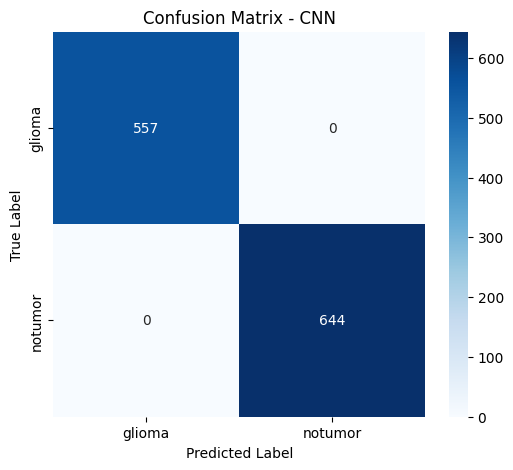

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - CNN")
plt.show()

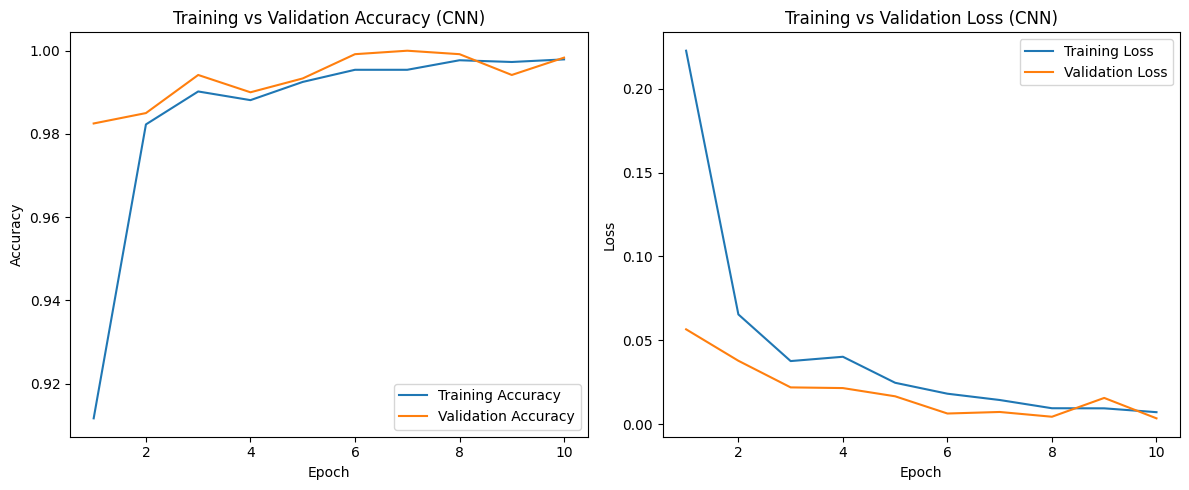

In [40]:
import matplotlib.pyplot as plt

# Ambil history
acc      = history_cnn.history["accuracy"]
val_acc  = history_cnn.history["val_accuracy"]
loss     = history_cnn.history["loss"]
val_loss = history_cnn.history["val_loss"]

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# ===== Accuracy =====
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (CNN)")
plt.legend()

# ===== Loss =====
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss (CNN)")
plt.legend()

plt.tight_layout()
plt.show()

In [41]:
# SAVE MODEL
cnn_model.save("cnn_non_pretrained.h5")

# SAVE HISTORY JSON
with open("cnn_non_pretrained_history.json", "w") as f:
    json.dump(history_cnn.history, f)

print("✅ CNN model & history saved")

✅ CNN model & history saved


In [42]:
resnet_train_datagen = ImageDataGenerator(preprocessing_function=resnet_preprocess)
resnet_val_datagen   = ImageDataGenerator(preprocessing_function=resnet_preprocess)

resnet_train_gen = resnet_train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=True
)

resnet_val_gen = resnet_val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

Found 4799 images belonging to 2 classes.
Found 1201 images belonging to 2 classes.


In [43]:
inputs = Input(shape=(224,224,3))
base_model = ResNet50(weights="imagenet", include_top=False, input_tensor=inputs)
base_model.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

In [44]:
resnet_model = models.Model(inputs, outputs)

resnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

resnet_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,112,513 (91.98 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop_resnet = EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    restore_best_weights=True,
    verbose=1,
    mode="max"
)

In [47]:
history_resnet_1 = resnet_model.fit(
    resnet_train_gen,
    validation_data=resnet_val_gen,
    epochs=10,
    callbacks=[early_stop_resnet]
)

Epoch 1/10


C:\Users\rakhmat fadhilah\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.8550 - loss: 0.3150 - val_accuracy: 0.9883 - val_loss: 0.0349
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.9881 - loss: 0.0391 - val_accuracy: 0.9992 - val_loss: 0.0139
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.9962 - loss: 0.0178 - val_accuracy: 0.9983 - val_loss: 0.0082
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 187s 1s/step - accuracy: 0.9980 - loss: 0.0116 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 185s 1s/step - accuracy: 0.9987 - loss: 0.0078 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.9994 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.9988 - loss: 0.0061 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.


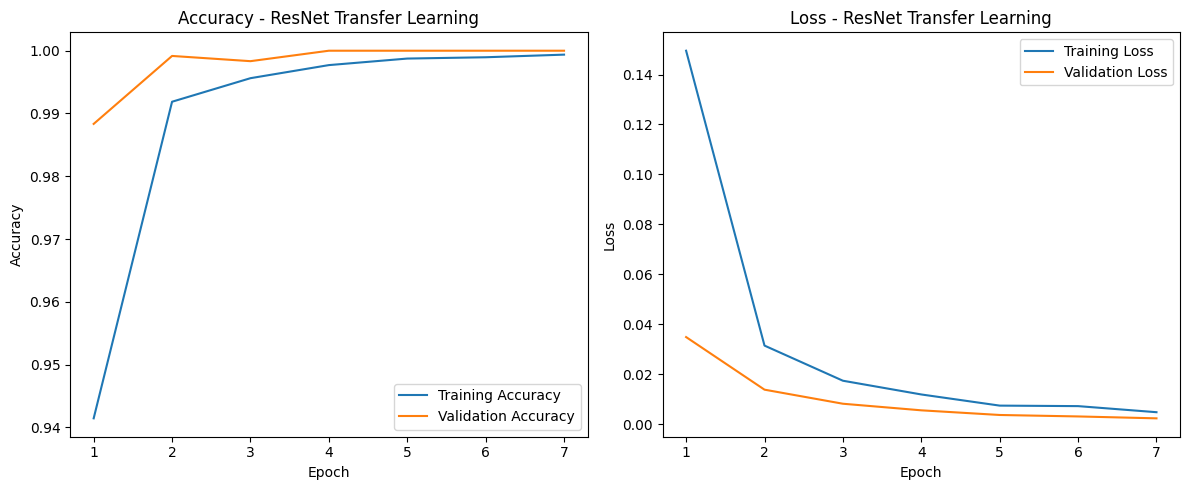

In [48]:
import matplotlib.pyplot as plt

# Ambil data dari history
acc      = history_resnet_1.history["accuracy"]
val_acc  = history_resnet_1.history["val_accuracy"]
loss     = history_resnet_1.history["loss"]
val_loss = history_resnet_1.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# ===== Grafik Accuracy =====
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy - ResNet Transfer Learning")
plt.legend()

# ===== Grafik Loss =====
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss - ResNet Transfer Learning")
plt.legend()

plt.tight_layout()
plt.show()

In [49]:
import numpy as np

# Ground truth
y_true = resnet_val_gen.classes

# Prediksi probabilitas
y_pred_prob = resnet_model.predict(resnet_val_gen)

# Konversi ke label biner (0 / 1)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()

print("y_true shape:", y_true.shape)
print("y_pred shape:", y_pred.shape)

38/38 ━━━━━━━━━━━━━━━━━━━━ 38s 978ms/step
y_true shape: (1201,)
y_pred shape: (1201,)


In [50]:
from sklearn.metrics import classification_report

class_names = list(resnet_val_gen.class_indices.keys())

print("===== CLASSIFICATION REPORT (RESNET TRANSFER LEARNING) =====")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))

===== CLASSIFICATION REPORT (RESNET TRANSFER LEARNING) =====
              precision    recall  f1-score   support

      glioma       1.00      1.00      1.00       557
     notumor       1.00      1.00      1.00       644

    accuracy                           1.00      1201
   macro avg       1.00      1.00      1.00      1201
weighted avg       1.00      1.00      1.00      1201



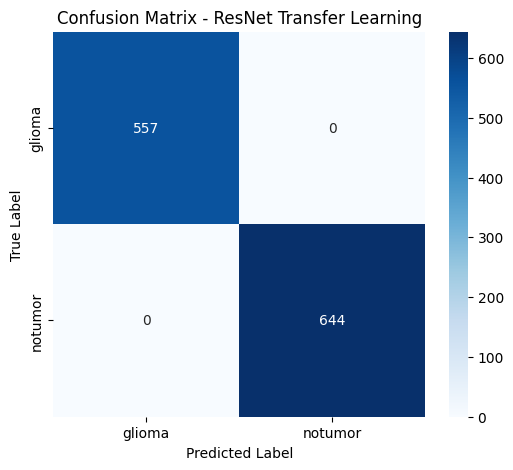

In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - ResNet Transfer Learning")
plt.show()

In [52]:
import pandas as pd

# Confusion Matrix
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
cm_df.to_csv("resnet_confusion_matrix.csv")

# Classification Report
report_dict = classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    output_dict=True
)
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv("resnet_classification_report.csv")

print("✅ ResNet evaluation results saved.")

✅ ResNet evaluation results saved.


In [53]:
base_model.trainable = True
for layer in base_model.layers[:-10]:
    layer.trainable = False

resnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop_resnet_ft = EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    restore_best_weights=True,
    verbose=1,
    mode="max"
)

In [55]:
history_resnet_2 = resnet_model.fit(
    resnet_train_gen,
    validation_data=resnet_val_gen,
    epochs=10,
    callbacks=[early_stop_resnet_ft]
)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.9988 - loss: 0.0100 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 9.8754e-04
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 5.9721e-04
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 3.9689e-04
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.


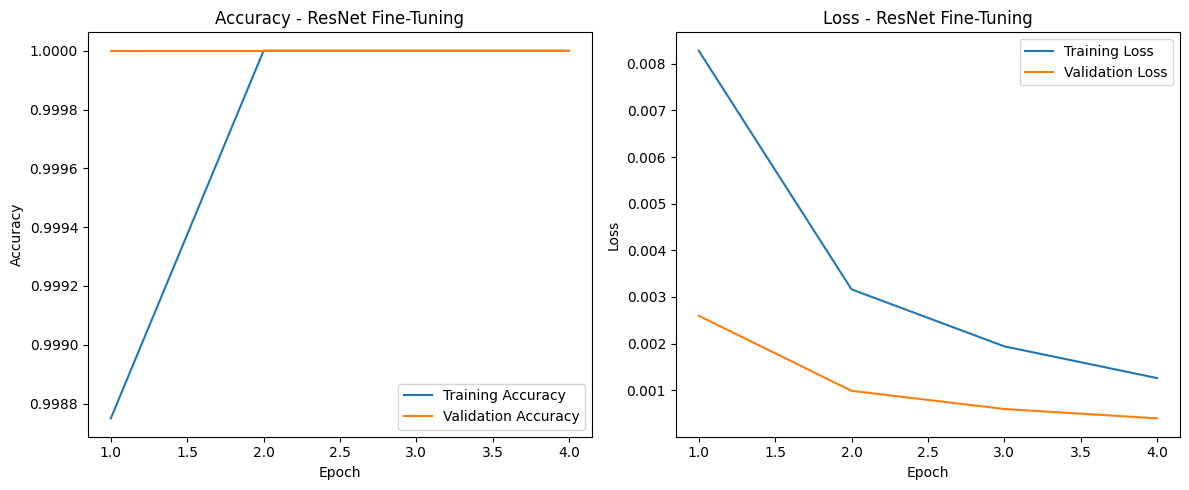

In [56]:
import matplotlib.pyplot as plt

# Ambil data dari history fine-tuning
acc      = history_resnet_2.history["accuracy"]
val_acc  = history_resnet_2.history["val_accuracy"]
loss     = history_resnet_2.history["loss"]
val_loss = history_resnet_2.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# ===== Grafik Accuracy =====
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy - ResNet Fine-Tuning")
plt.legend()

# ===== Grafik Loss =====
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss - ResNet Fine-Tuning")
plt.legend()

plt.tight_layout()
plt.show()

In [57]:
import numpy as np

# Label sebenarnya
y_true = resnet_val_gen.classes

# Prediksi probabilitas
y_pred_prob = resnet_model.predict(resnet_val_gen)

# Konversi ke label biner (0 / 1)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()

print("y_true shape:", y_true.shape)
print("y_pred shape:", y_pred.shape)

38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 985ms/step
y_true shape: (1201,)
y_pred shape: (1201,)


In [58]:
from sklearn.metrics import classification_report

class_names = list(resnet_val_gen.class_indices.keys())

print("===== CLASSIFICATION REPORT (RESNET FINE-TUNED) =====")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))

===== CLASSIFICATION REPORT (RESNET FINE-TUNED) =====
              precision    recall  f1-score   support

      glioma       1.00      1.00      1.00       557
     notumor       1.00      1.00      1.00       644

    accuracy                           1.00      1201
   macro avg       1.00      1.00      1.00      1201
weighted avg       1.00      1.00      1.00      1201



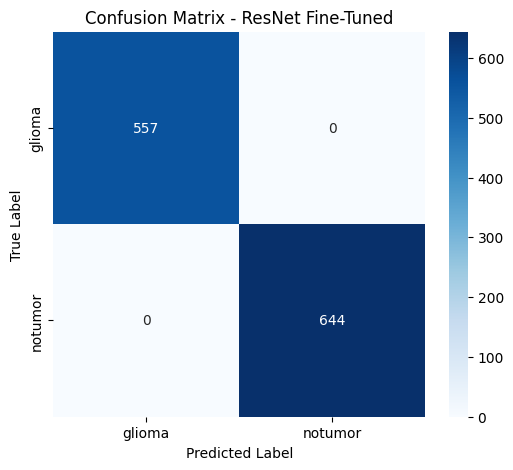

In [59]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - ResNet Fine-Tuned")
plt.show()

In [60]:
# SAVE MODEL
resnet_model.save("resnet50_head.h5")

# SAVE HISTORY JSON
with open("resnet50_head_history.json", "w") as f:
    json.dump(history_resnet_1.history, f)

print("✅ ResNet50 head model & history saved")

✅ ResNet50 head model & history saved


In [61]:
# SAVE MODEL
resnet_model.save("resnet50_finetuned.h5")

# SAVE HISTORY JSON
with open("resnet50_finetuned_history.json", "w") as f:
    json.dump(history_resnet_2.history, f)

print("✅ ResNet50 finetuned model & history saved")

✅ ResNet50 finetuned model & history saved


In [62]:
eff_train_datagen = ImageDataGenerator(preprocessing_function=effnet_preprocess)
eff_val_datagen   = ImageDataGenerator(preprocessing_function=effnet_preprocess)

eff_train_gen = eff_train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=True
)

eff_val_gen = eff_val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

Found 4799 images belonging to 2 classes.
Found 1201 images belonging to 2 classes.


In [63]:
inputs = Input(shape=(224,224,3))
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_tensor=inputs)
base_model.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

eff_model = models.Model(inputs, outputs)

In [64]:
eff_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

eff_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_3[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,377,764 (16.70 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop_eff = EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    restore_best_weights=True,
    verbose=1,
    mode="max"
)

In [66]:
history_eff = eff_model.fit(
    eff_train_gen,
    validation_data=eff_val_gen,
    epochs=10,
    callbacks=[early_stop_eff]
)

Epoch 1/10


C:\Users\rakhmat fadhilah\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 99s 614ms/step - accuracy: 0.8529 - loss: 0.3575 - val_accuracy: 0.9842 - val_loss: 0.0759
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 89s 597ms/step - accuracy: 0.9828 - loss: 0.0795 - val_accuracy: 0.9900 - val_loss: 0.0384
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 90s 598ms/step - accuracy: 0.9860 - loss: 0.0481 - val_accuracy: 0.9950 - val_loss: 0.0268
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 90s 598ms/step - accuracy: 0.9920 - loss: 0.0329 - val_accuracy: 0.9975 - val_loss: 0.0190
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 95s 633ms/step - accuracy: 0.9873 - loss: 0.0327 - val_accuracy: 0.9975 - val_loss: 0.0155
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 89s 592ms/step - accuracy: 0.9905 - loss: 0.0275 - val_accuracy: 0.9992 - val_loss: 0.0114
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 89s 592ms/step - accuracy: 0.9955 - loss: 0.0195 - val_accuracy: 1.0000 - val_loss: 0.0105
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 89s 593ms/step - accuracy: 0.9956 - loss: 0.0178 - val

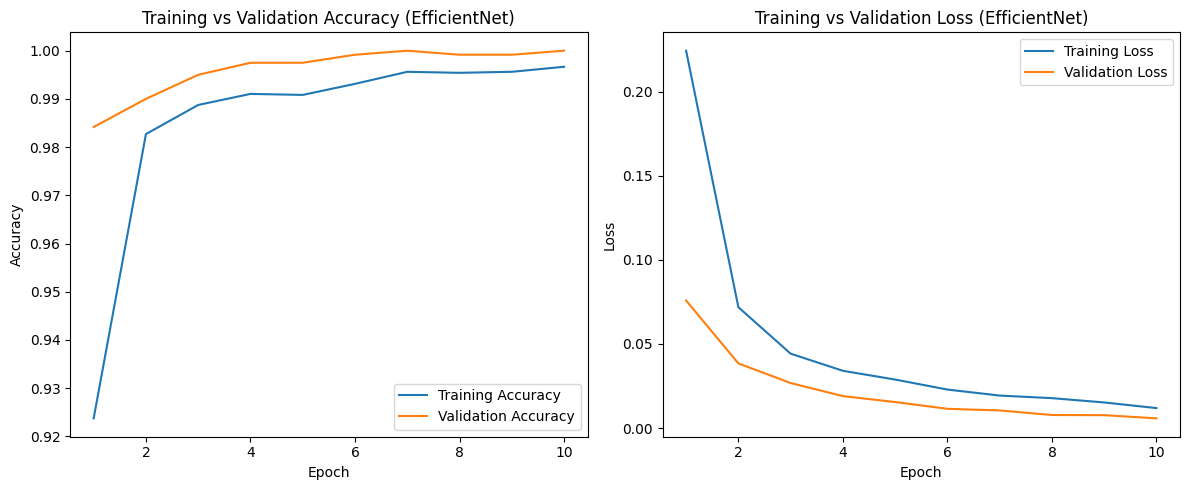

In [67]:
import matplotlib.pyplot as plt

# Ambil history
acc      = history_eff.history["accuracy"]
val_acc  = history_eff.history["val_accuracy"]
loss     = history_eff.history["loss"]
val_loss = history_eff.history["val_loss"]

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# ===== Accuracy =====
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (EfficientNet)")
plt.legend()

# ===== Loss =====
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss (EfficientNet)")
plt.legend()

plt.tight_layout()
plt.show()

In [68]:
import numpy as np

# Ground truth
y_true = eff_val_gen.classes

# Prediksi probabilitas
y_pred_prob = eff_model.predict(eff_val_gen)

# Konversi ke label 0 / 1
y_pred = (y_pred_prob > 0.5).astype(int).ravel()

print("y_true shape:", y_true.shape)
print("y_pred shape:", y_pred.shape)

38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 509ms/step
y_true shape: (1201,)
y_pred shape: (1201,)


In [69]:
from sklearn.metrics import classification_report

class_names = list(eff_val_gen.class_indices.keys())

print("===== CLASSIFICATION REPORT (EFFICIENTNETB0) =====")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))

===== CLASSIFICATION REPORT (EFFICIENTNETB0) =====
              precision    recall  f1-score   support

      glioma       1.00      1.00      1.00       557
     notumor       1.00      1.00      1.00       644

    accuracy                           1.00      1201
   macro avg       1.00      1.00      1.00      1201
weighted avg       1.00      1.00      1.00      1201



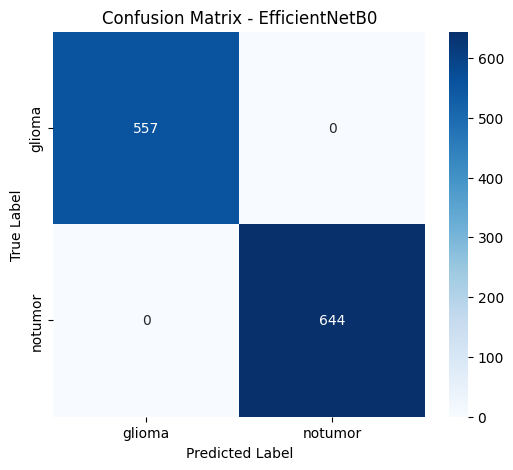

In [70]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - EfficientNetB0")
plt.show()

In [71]:
import pandas as pd

# Simpan confusion matrix
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
cm_df.to_csv("effnet_confusion_matrix.csv")

# Simpan classification report
report_dict = classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    output_dict=True
)
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv("effnet_classification_report.csv")

print("✅ EfficientNet evaluation results saved.")

✅ EfficientNet evaluation results saved.


In [72]:
# SAVE MODEL
eff_model.save("efficientnetb0.h5")

# SAVE HISTORY JSON
with open("efficientnetb0_history.json", "w") as f:
    json.dump(history_eff.history, f)

print("✅ EfficientNetB0 model & history saved")

✅ EfficientNetB0 model & history saved


In [73]:
# ============================================
# FINE TUNING EFFICIENTNETB0
# ============================================

base_model.trainable = True

# Freeze layer awal, buka 10 layer terakhir
fine_tune_at = len(base_model.layers) - 10

for i, layer in enumerate(base_model.layers):
    layer.trainable = True if i >= fine_tune_at else False

In [74]:
# Compile ulang dengan LR kecil
eff_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [75]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop_eff_ft = EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    restore_best_weights=True,
    verbose=1,
    mode="max"
)

In [76]:
history_eff_finetune = eff_model.fit(
    eff_train_gen,
    validation_data=eff_val_gen,
    epochs=10,
    callbacks=[early_stop_eff_ft]
)

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 106s 652ms/step - accuracy: 0.9893 - loss: 0.0536 - val_accuracy: 0.9958 - val_loss: 0.0155
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 99s 663ms/step - accuracy: 0.9954 - loss: 0.0299 - val_accuracy: 1.0000 - val_loss: 0.0127
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 94s 626ms/step - accuracy: 0.9955 - loss: 0.0242 - val_accuracy: 1.0000 - val_loss: 0.0100
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 94s 629ms/step - accuracy: 0.9959 - loss: 0.0201 - val_accuracy: 1.0000 - val_loss: 0.0082
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 94s 628ms/step - accuracy: 0.9966 - loss: 0.0168 - val_accuracy: 1.0000 - val_loss: 0.0067
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


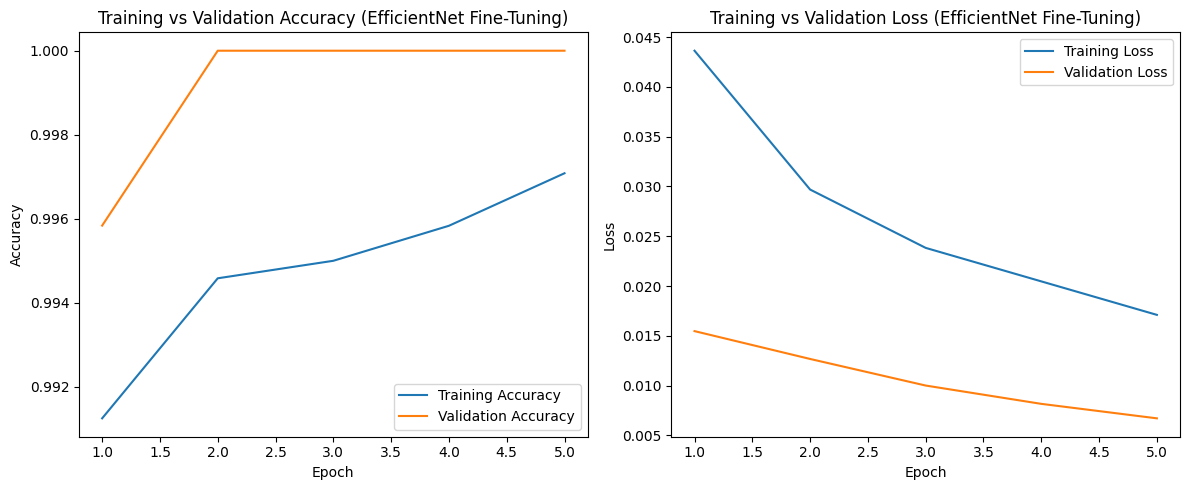

In [77]:
import matplotlib.pyplot as plt

# Ambil history fine-tuning
acc      = history_eff_finetune.history["accuracy"]
val_acc  = history_eff_finetune.history["val_accuracy"]
loss     = history_eff_finetune.history["loss"]
val_loss = history_eff_finetune.history["val_loss"]

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# ===== Accuracy =====
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy (EfficientNet Fine-Tuning)")
plt.legend()

# ===== Loss =====
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss (EfficientNet Fine-Tuning)")
plt.legend()

plt.tight_layout()
plt.show()

In [78]:
from sklearn.metrics import classification_report

class_names = list(eff_val_gen.class_indices.keys())

print("===== CLASSIFICATION REPORT (EFFICIENTNETB0 - FINE TUNED) =====")
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))

===== CLASSIFICATION REPORT (EFFICIENTNETB0 - FINE TUNED) =====
              precision    recall  f1-score   support

      glioma       1.00      1.00      1.00       557
     notumor       1.00      1.00      1.00       644

    accuracy                           1.00      1201
   macro avg       1.00      1.00      1.00      1201
weighted avg       1.00      1.00      1.00      1201



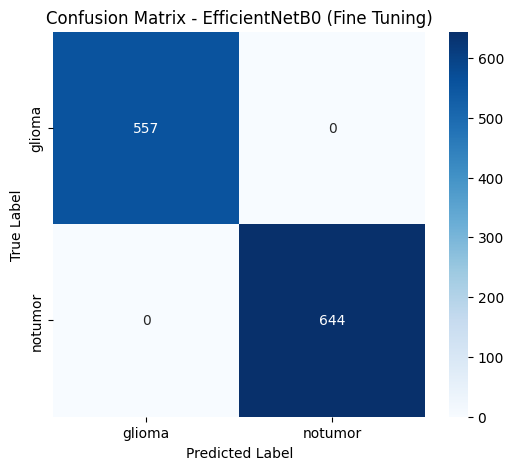

In [79]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - EfficientNetB0 (Fine Tuning)")
plt.show()

In [80]:
import pandas as pd

# Confusion Matrix
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
cm_df.to_csv("effnet_finetune_confusion_matrix.csv")

# Classification Report
report_dict = classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    output_dict=True
)
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_csv("effnet_finetune_classification_report.csv")

print("✅ Fine-tuned EfficientNet evaluation results saved.")

✅ Fine-tuned EfficientNet evaluation results saved.


In [81]:
# SAVE FINETUNED MODEL
eff_model.save("efficientnetb0_finetuned.h5")

# SAVE FINETUNE HISTORY JSON
with open("efficientnetb0_finetuned_history.json", "w") as f:
    json.dump(history_eff_finetune.history, f)

print("✅ EfficientNetB0 FINETUNED model & history saved")

✅ EfficientNetB0 FINETUNED model & history saved
